<a href="https://colab.research.google.com/github/Spurti1993/ExcleR_Project/blob/main/Impact_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip freeze |grep pandas-profiling

pandas-profiling==1.4.1


In [4]:
!pip install pip-autoremove
!pip-autoremove pandas-profiling[notebook] -y
!pip install pandas-profiling
!pip install ppscore

The 'tf-estimator-nightly==2.8.0.dev2021122109' distribution was not found and is required by the application
Skipping tf-estimator-nightly
jupyter-client 5.3.5 is installed but jupyter-client>=6.1.5 is required
Redoing requirement with just package name...
requests 2.27.1 is installed but requests~=2.23.0 is required
Redoing requirement with just package name...
folium 0.8.3 is installed but folium==0.2.1 is required
Redoing requirement with just package name...
imgaug 0.2.9 is installed but imgaug<0.2.7,>=0.2.5 is required
Redoing requirement with just package name...
pandas-profiling 3.1.0 (/usr/local/lib/python3.7/dist-packages)
    missingno 0.5.0 (/usr/local/lib/python3.7/dist-packages)
        seaborn 0.11.2 (/usr/local/lib/python3.7/dist-packages)
    phik 0.12.0 (/usr/local/lib/python3.7/dist-packages)
    pydantic 1.9.0 (/usr/local/lib/python3.7/dist-packages)
    tangled-up-in-unicode 0.1.0 (/usr/local/lib/python3.7/dist-packages)
    multimethod 1.7 (/usr/local/lib/python3.

In [32]:
import pandas as pd
import numpy as np
import pandas_profiling as pp1
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [33]:
df = pd.read_csv('incident_event_log.csv')
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [34]:
df.incident_state.unique()
#'-100' in df.incident_state.unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence', '-100'],
      dtype=object)

In [35]:
#As we can see ? and -100 appeared in the df which are nothing but missing values and it may hinder our further analysis.
missing_Values = ['?','-100']
df = pd.read_csv('incident_event_log.csv',na_values = missing_Values)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [36]:
#pp.ProfileReport(df).to_file('output.html')

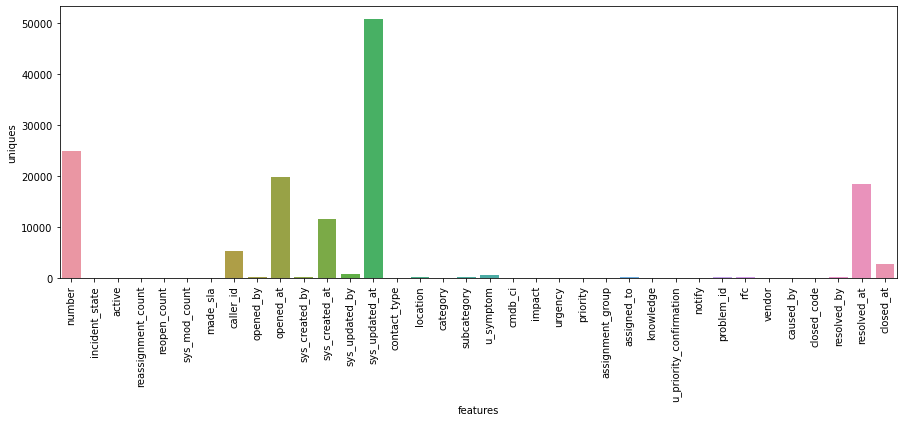

In [37]:
#Plot of unique value of each features
df_unq = df.nunique().reset_index()
df_unq.columns = ['features', 'uniques']
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='features', y='uniques', data=df_unq)
plot.tick_params(axis='x', rotation=90)

In [38]:
print('Shape of DataFrame ',df.shape,' \n Size of DataFrame', df.size)
print('\n \n--------*******************************************--------')
print('\n Duplicat Rows in DataFrame', df.duplicated().sum())#or use isnull
print('\n \n--------*******************************************--------')
print('\n Total No. of Missing Values', df.isna().sum().sum())
print('\n \n--------*******************************************--------')
print('\n No. of Missing Values for each feature \n\n', df.isna().sum())
print('\n \n--------*******************************************--------')
print('\n ===Data Types of the DataSet=== \n\n', df.dtypes)#Identification of data types
print('\n \n--------*******************************************--------')


Shape of DataFrame  (141712, 36)  
 Size of DataFrame 5101632

 
--------*******************************************--------

 Duplicat Rows in DataFrame 0

 
--------*******************************************--------

 Total No. of Missing Values 894602

 
--------*******************************************--------

 No. of Missing Values for each feature 

 number                          0
incident_state                  5
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                

In [39]:
#Descriptive Statistic
#For numerical parameters, fields like mean, std deviation, percentiles, and maximum have been populated.
#For categorical features, count, un1ique, top (most frequent value), and corresponding frequency have been populated. This gives us a broad idea of our dataset.
df.describe(include='all')

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
count,141712,141707,141712,141712.000000,141712.000000,141712.000000,141712,141683,136877,141712,88636,88636,141712,141712,141712,141636,141634,141601,108748,445,141712,141712,141712,127499,114216,141712,141712,141712,2295,991,244,23,140998,141486,138571,141712
unique,24918,8,2,NaN,NaN,NaN,2,5244,207,19849,185,11552,846,50664,5,224,58,254,525,50,3,3,4,78,234,2,2,2,252,181,4,3,17,216,18505,2707
top,INC0019396,Active,True,NaN,NaN,NaN,True,Caller 1904,Opened by 17,14/4/2016 20:42,Created by 10,4/7/2016 14:50,Updated by 908,24/3/2016 18:40,Phone,Location 204,Category 26,Subcategory 174,Symptom 491,cmdb_ci 31,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 17,False,False,Do Not Notify,Problem ID 14,CHG0000132,code 8s,CHG0000097,code 6,Resolved by 15,3/6/2016 16:29,24/3/2016 18:59
freq,58,38716,116726,NaN,NaN,NaN,132497,1425,41466,58,24223,56,36162,420,140462,31690,18453,35785,51985,32,134335,134094,132452,43474,10590,116349,100740,141593,184,20,167,11,86583,15421,93,3324
mean,NaN,NaN,NaN,1.104197,0.021918,5.080946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.734673,0.207302,7.680652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#% of NA values of each feature
df_missingValues = pd.DataFrame(df.isna().sum()).reset_index()
df_missingValues.columns=['feature','MissingValues']
df_missingValues['df_missingValues_Percentage'] = (df_missingValues.MissingValues/len(df))*100
#df_missingValues['df_missingValues_Percentage'] = df_missingValues.MissingValues.apply(lambda x: round((x/len(incident_df1))*100))
df_missingValues

,feature,MissingValues,df_missingValues_Percentage
0,number,0,0.000000
1,incident_state,5,0.003528
2,active,0,0.000000
3,reassignment_count,0,0.000000
4,reopen_count,0,0.000000
5,sys_mod_count,0,0.000000
6,made_sla,0,0.000000
7,caller_id,29,0.020464
8,opened_by,4835,3.411849
9,opened_at,0,0.000000


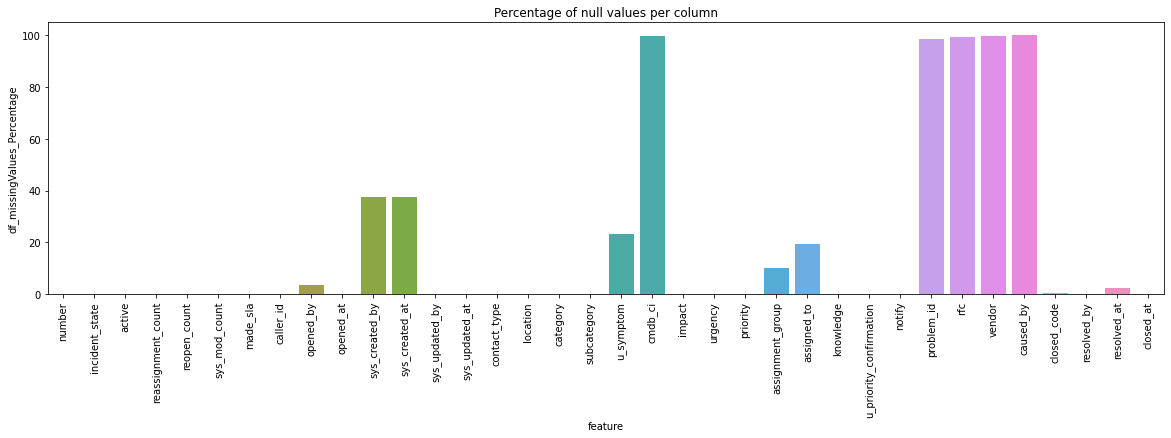

In [41]:
#Missing value percentage plot
fig,ax = plt.subplots(figsize=(20,5))
sns.barplot(x='feature',y='df_missingValues_Percentage',data = df_missingValues).tick_params(axis='x', rotation=90)
plt.title('Percentage of null values per column')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


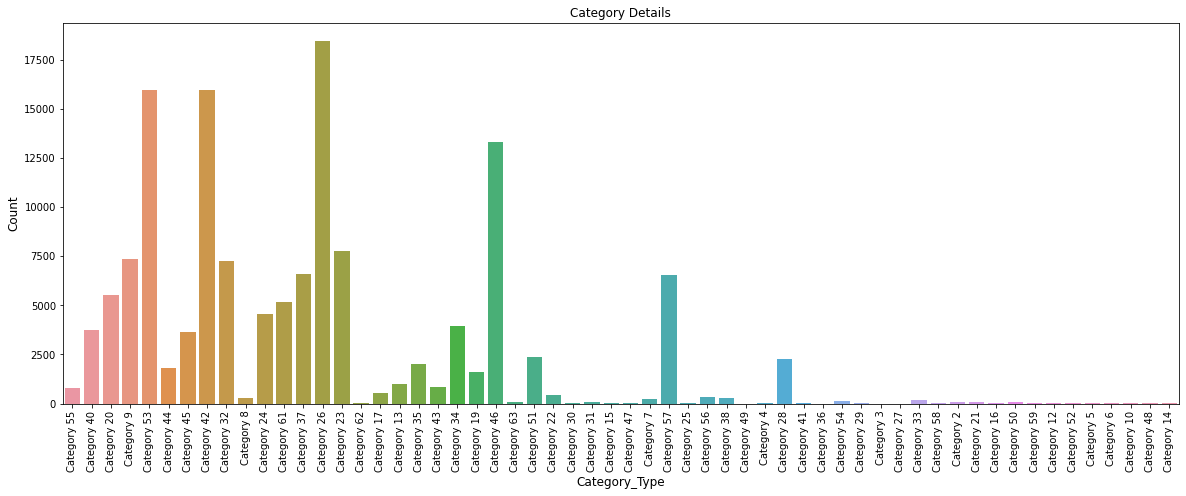

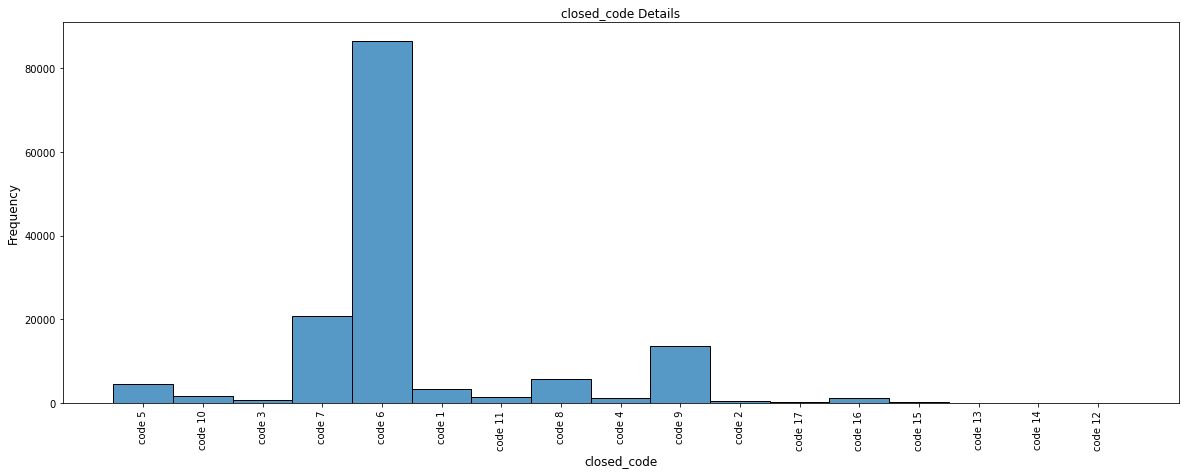

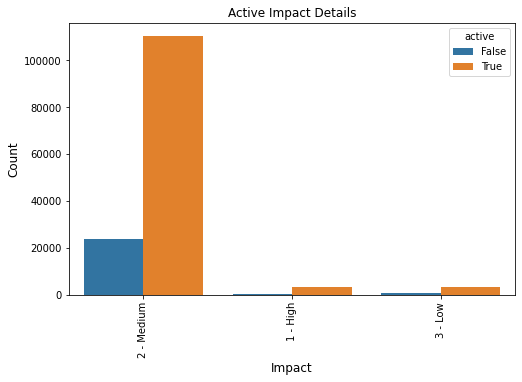

In [42]:
#data visulaization of few features to check the frequency of feature
fig,ax = plt.subplots(figsize=(20,7))
sns.countplot(df['category'])
plt.title("Category Details")
plt.xlabel("Category_Type", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(20,7))
sns.histplot(df['closed_code'])
plt.title("closed_code Details")
plt.xlabel("closed_code", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='impact',hue='active',data=df)
plt.title("Active Impact Details")
plt.xlabel("Impact", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=90)
plt.show()

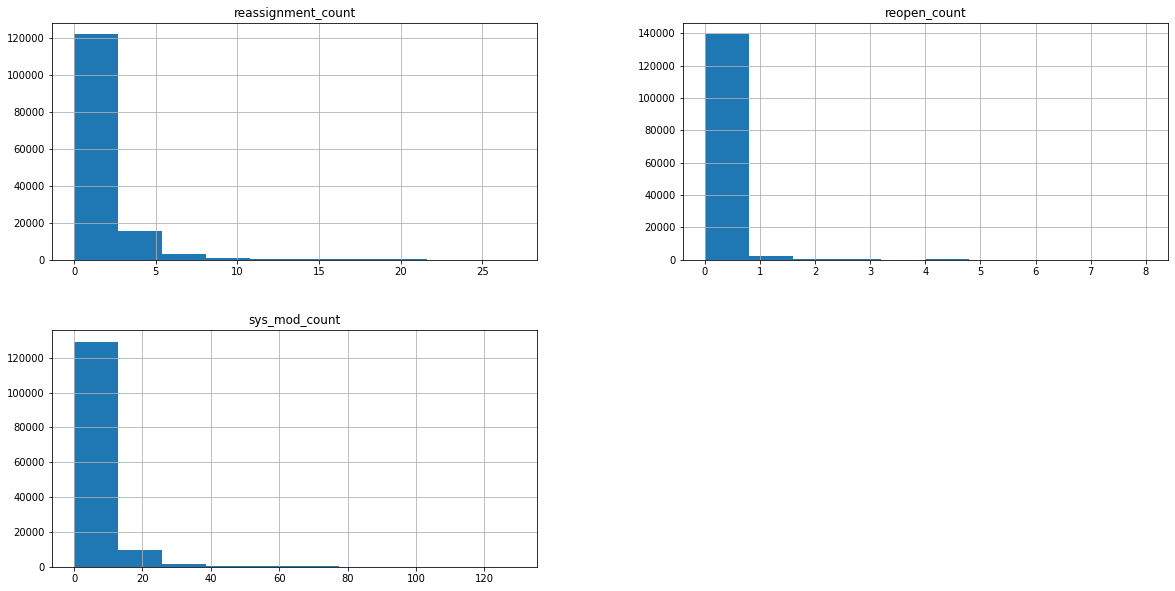

In [43]:
df.hist(figsize=(20 , 10))
plt.xticks(rotation=100)
plt.show()

In [44]:
#Converting the datatype from obj to datetime format Date column handling
df[['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at']] = df[['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at']].apply(pd.to_datetime)
df[['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at']].dtypes

#converting the datatype from obj to bool
df['notify']=df['notify'].astype('bool')

# List of categorical Data
cat_df = df.select_dtypes(include='object')#categorical data
bool_df = df.select_dtypes(include='bool')#Boolean data
num_df = df.select_dtypes(include='int64')#Numeric data
date_df = df.select_dtypes(include='datetime64[ns]')#datetime data
#Printing in tabular format
print ("\n {:<20} {:<20} {:<20} {:<20}".format('Categorical Feature','Boolean Feature','Numerical Feature','Date Feature'))
print("{:<20} {:<20} {:<20} {:<20}".format(len(cat_df.columns),len(bool_df.columns),len(num_df.columns),len(date_df.columns)))


 Categorical Feature  Boolean Feature      Numerical Feature    Date Feature        
23                   5                    3                    5                   


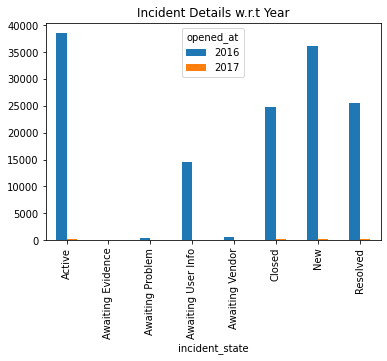

In [45]:
#plot Incident Details w.r.t Year
pd.crosstab(df.incident_state,df.opened_at.dt.year).plot(kind='bar')
plt.title("Incident Details w.r.t Year")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


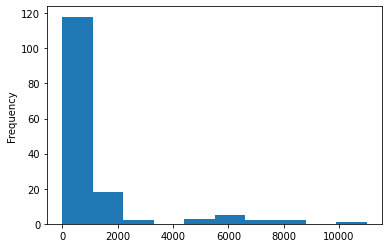

In [46]:

df_1 = df[['opened_at','incident_state']]
df_1['year']=df_1.opened_at.dt.year
df_1['month']=df_1.opened_at.dt.month
df_1.groupby(['year','month'])['incident_state'].value_counts().plot(kind='hist',x='incident_state')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

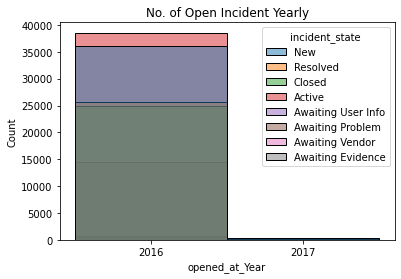

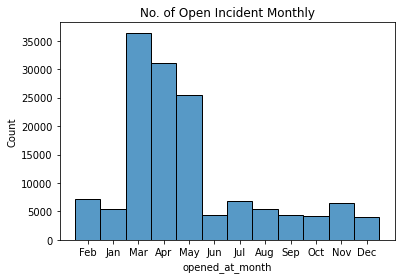

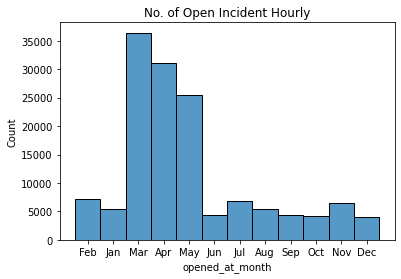

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

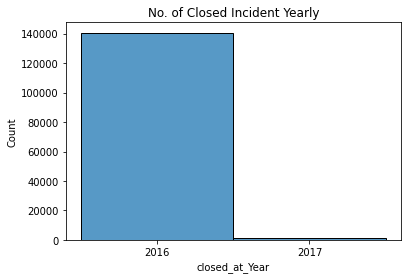

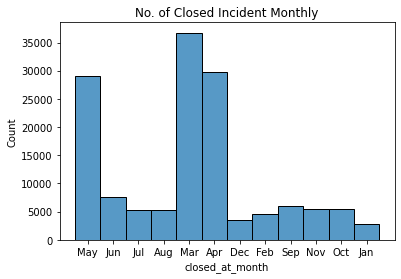

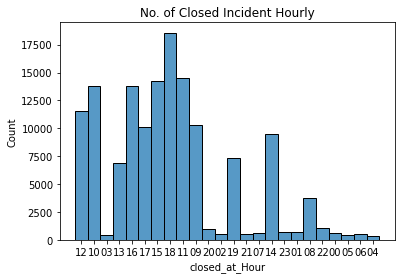

In [47]:
#no. of incidents opened in yearly based vs monthly based vs hourly based
date_df['opened_at_Year'] = date_df.opened_at.dt.strftime('%Y')
date_df['opened_at_month'] = date_df.opened_at.dt.strftime('%b')
date_df['opened_at_Hour'] = date_df.opened_at.dt.strftime('%H')
sns.histplot(data=df, x=date_df.opened_at_Year, hue='incident_state')
plt.title('No. of Open Incident Yearly')
plt.show()
sns.histplot(data=date_df, x=date_df.opened_at_month)
plt.title('No. of Open Incident Monthly')
plt.show()
sns.histplot(data=date_df, x=date_df.opened_at_month)
plt.title('No. of Open Incident Hourly')
plt.show()
date_df['closed_at_Year'] = date_df.closed_at.dt.strftime('%Y')
date_df['closed_at_month'] = date_df.closed_at.dt.strftime('%b')
date_df['closed_at_Hour'] = date_df.closed_at.dt.strftime('%H')
sns.histplot(data=date_df, x=date_df.closed_at_Year)
plt.title('No. of Closed Incident Yearly')
plt.show()
sns.histplot(data=date_df, x=date_df.closed_at_month)
plt.title('No. of Closed Incident Monthly')
plt.show()
sns.histplot(data=date_df, x=date_df.closed_at_Hour)
plt.title('No. of Closed Incident Hourly')
plt.show()



Text(0.5, 0.98, 'Numeric Feature distribution')

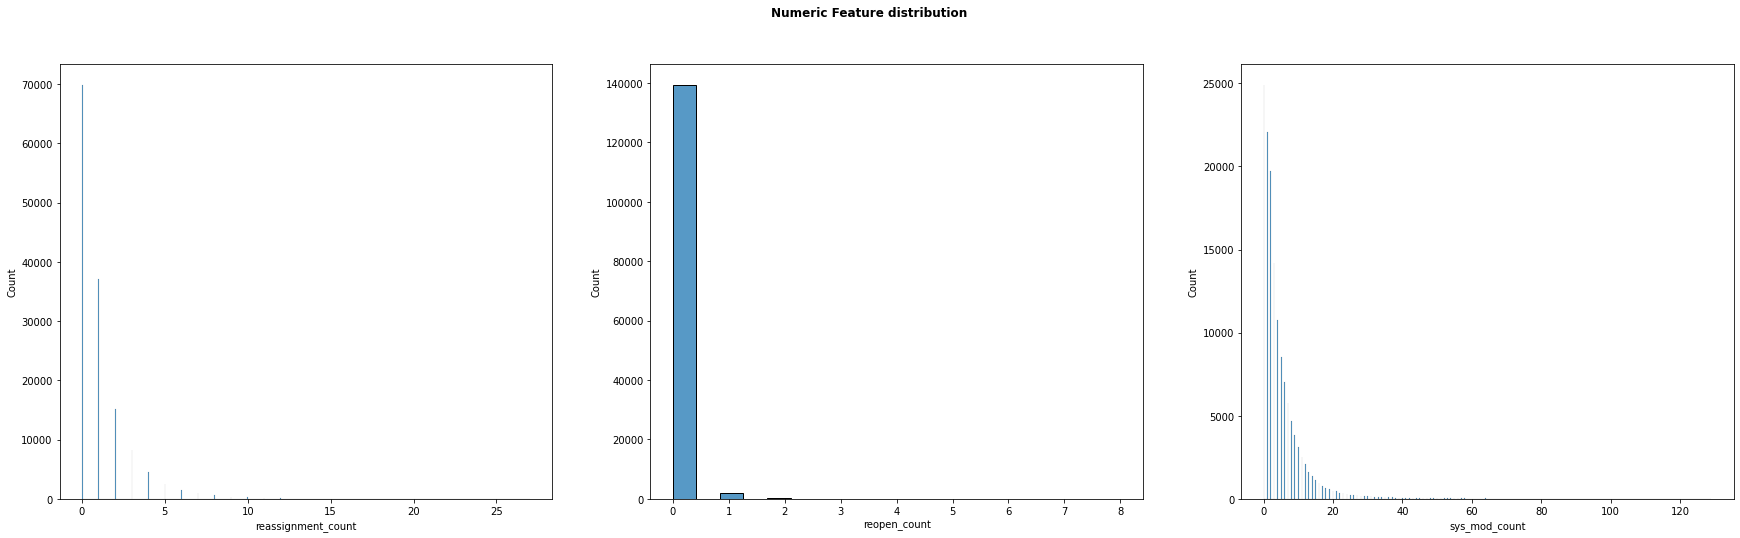

In [48]:
#visualizing numeric column
num_df.columns
fig, ax = plt.subplots(1, 3 , figsize=(30,8))
for idx, ax in enumerate(ax):
    sns.histplot(data=num_df, x=num_df.iloc[:,idx], ax=ax)

fig.suptitle('Numeric Feature distribution', ha='center', fontweight='bold')
#numeric features have a left skewed distribution.


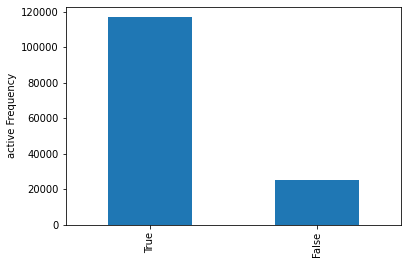

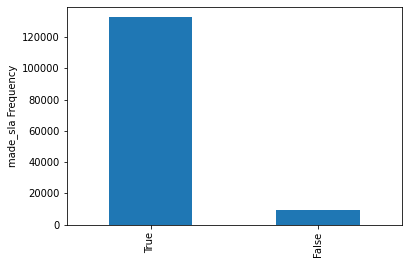

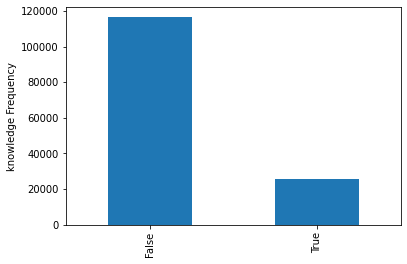

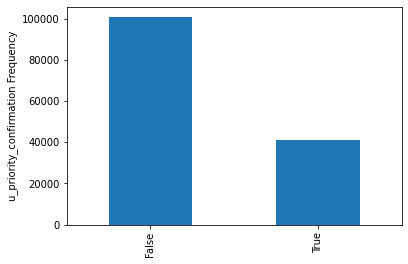

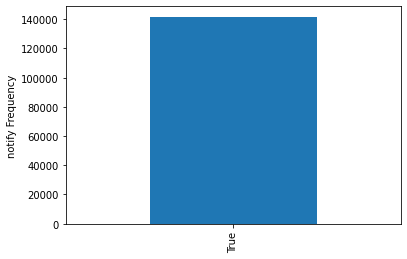

In [49]:
bol_df = df.select_dtypes(include='bool')
for col in bol_df.columns:
  df[col].value_counts().plot.bar()
  plt.ylabel(col+' Frequency')
  plt.show()

In [50]:
#Deal with missing data Below are the Imputation technique used to handle NAN values

#1.drop data
  #As we can see cmdb_ci,problem_id,rfc,vendor,caused_by have NA values in greater number nearly equal to the row size of the data set so we can remove that column
  #%of NA value is greater than 60%
df.drop(['cmdb_ci','problem_id','rfc','vendor','caused_by'],axis=1,inplace=True)
df.reset_index(drop=True)
print('Shape of DataFrame After Drop',df.shape)
print('\n--------*******************************************--------')
print('\n Total No. of Missing Values', df.isna().sum().sum())
print('\n \n--------*******************************************--------')
print('\n No. of Missing Values for each feature \n\n', df.isna().sum())
print('\n \n--------*******************************************--------')
  #Drop the whole row as we are predicting the impact of the incident and if the incident state is N/A then its of no use
df.drop(df[df.incident_state.isna()].index,axis=0,inplace=True)
df.reset_index(drop=True)
print('Shape of DataFrame After Drop 2',df.shape)
print('\n \n--------*******************************************--------')
print('\n \n Total No. of Missing Values', df.isna().sum().sum())
print('\n \n--------*******************************************--------')
print('\n \n No. of Missing Values for each feature \n\n', df.isna().sum())
print('\n \n--------*******************************************--------')
  #Drop the cols with date as we dont need that for predicting
#df.drop(['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at'],axis=1,inplace=True)
#df.reset_index(drop=True)

#2.replace data
  #a replace/fillna it by frequency/mean/median/mode 
df.caller_id.replace(np.NaN,df.caller_id.value_counts().idxmax(),inplace=True)
df.opened_by.replace(np.NaN,df.opened_by.value_counts().idxmax(),inplace=True)
df.sys_created_by.replace(np.NaN,df.sys_created_by.value_counts().idxmax(),inplace=True)
df.sys_created_at.replace(np.NaN,df.sys_created_at.describe().top,inplace=True)#Eventually this will be non_null value as it will throw error
df.subcategory.replace(np.NaN,df.subcategory.value_counts().idxmax(),inplace=True)
df.u_symptom.replace(np.NaN,df.u_symptom.value_counts().idxmax(),inplace=True)
df.location.replace(np.NaN,df.location.value_counts().idxmax(),inplace=True)
df.category.replace(np.NaN,df.category.value_counts().idxmax(),inplace=True)
df.assignment_group.replace(np.NaN,df.assignment_group.value_counts().idxmax(),inplace=True)
df.assigned_to.replace(np.NaN,df.assigned_to.value_counts().idxmax(),inplace=True)
df.closed_code.replace(np.NaN,df.closed_code.value_counts().idxmax(),inplace=True)
df.resolved_by.replace(np.NaN,df.resolved_by.value_counts().idxmax(),inplace=True)
df.resolved_at.replace(np.NaN,df.resolved_at.describe().top,inplace=True)#Eventually this will be non_null value as it will throw error
df.reset_index()
print('Size of DataFrame',df.shape)
print('\n \n--------*******************************************--------')
print('\n \n Total No. of Missing Values', df.isna().sum().sum())
print('\n \n--------*******************************************--------')
print('\n \n No. of Missing Values for each feature \n\n', df.isna().sum())
print('\n \n--------*******************************************--------')

#3. KNN is another imputation technique used to replace the NAN values



Shape of DataFrame After Drop (141712, 31)

--------*******************************************--------

 Total No. of Missing Values 190040

 
--------*******************************************--------

 No. of Missing Values for each feature 

 number                         0
incident_state                 5
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
urgency                        0
priority                       0
assignment_group          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


Size of DataFrame (141707, 31)

 
--------*******************************************--------

 
 Total No. of Missing Values 0

 
--------*******************************************--------

 
 No. of Missing Values for each feature 

 number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify   

In [51]:
labelencoder = LabelEncoder()
df['incident_state'] = labelencoder.fit_transform(df['incident_state'])
df['notify'] = labelencoder.fit_transform(df['notify'])
df['u_priority_confirmation'] = labelencoder.fit_transform(df['u_priority_confirmation'])
df['knowledge'] = labelencoder.fit_transform(df['knowledge'])
df['made_sla'] = labelencoder.fit_transform(df['made_sla'])
df['active'] = labelencoder.fit_transform(df['active'])
df['contact_type'] = labelencoder.fit_transform(df['contact_type'])
df.head()


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,6,1,0,0,0,1,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,3,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,1,0,0,code 5,Resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00
1,INC0000045,7,1,0,0,2,1,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 642,2016-02-29 08:53:00,3,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,1,0,0,code 5,Resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00
2,INC0000045,7,1,0,0,3,1,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,3,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,1,0,0,code 5,Resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00
3,INC0000045,5,0,0,0,4,1,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-05-03 12:00:00,3,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,1,0,0,code 5,Resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00
4,INC0000047,6,1,0,0,0,1,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 746,2016-02-29 04:57:00,3,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,1,0,0,code 5,Resolved by 81,2016-01-03 09:52:00,2016-06-03 10:00:00


In [52]:
def numbers(element):   
    return "".join(filter(str.isnumeric, element))

df.loc[:,'number'] = [numbers(x) for x in df.number]
df.loc[:,'caller_id'] = [numbers(x) for x in df.caller_id]
df.loc[:,'opened_by'] = [numbers(x) for x in df.opened_by]
df.loc[:,'sys_created_by'] = [numbers(x) for x in df.sys_created_by]
df.loc[:,'sys_updated_by'] = [numbers(x) for x in df.sys_updated_by]
df.loc[:,'location'] = [numbers(x) for x in df.location]
df.loc[:,'category'] = [numbers(x) for x in df.category]
df.loc[:,'subcategory'] = [numbers(x) for x in df.subcategory]
df.loc[:,'u_symptom'] = [numbers(x) for x in df.u_symptom]
df.loc[:,'assignment_group'] = [numbers(x) for x in df.assignment_group]
df.loc[:,'assigned_to'] = [numbers(x) for x in df.assigned_to]
df.loc[:,'closed_code'] = [numbers(x) for x in df.closed_code]
df.loc[:,'resolved_by'] = [numbers(x) for x in df.resolved_by]
df.loc[:,'impact'] = [numbers(x) for x in df.impact]
df.loc[:,'urgency'] = [numbers(x) for x in df.urgency]
df.loc[:,'priority'] = [numbers(x) for x in df.priority]

df.head()


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,0000045,6,1,0,0,0,1,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,21,2016-02-29 01:23:00,3,143,55,170,72,2,2,3,56,17,1,0,0,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
1,0000045,7,1,0,0,2,1,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,642,2016-02-29 08:53:00,3,143,55,170,72,2,2,3,56,17,1,0,0,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
2,0000045,7,1,0,0,3,1,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,804,2016-02-29 11:29:00,3,143,55,170,72,2,2,3,56,17,1,0,0,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
3,0000045,5,0,0,0,4,1,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,908,2016-05-03 12:00:00,3,143,55,170,72,2,2,3,56,17,1,0,0,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
4,0000047,6,1,0,0,0,1,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,746,2016-02-29 04:57:00,3,165,40,215,471,2,2,3,70,89,1,0,0,5,81,2016-01-03 09:52:00,2016-06-03 10:00:00


In [88]:
df['opened_at_year']=df.opened_at.dt.year
df['opened_at_month']=df.opened_at.dt.month
df['opened_at_day']=df.opened_at.dt.day
df['opened_at_hour']=df.opened_at.dt.hour

df['sys_created_at_year']=df.sys_created_at.dt.year
df['sys_created_at_month']=df.sys_created_at.dt.month
df['sys_created_at_day']=df.sys_created_at.dt.day
df['sys_created_at_hour']=df.sys_created_at.dt.hour

df['sys_updated_at_year']=df.sys_updated_at.dt.year
df['sys_updated_at_month']=df.sys_updated_at.dt.month
df['sys_updated_at_day']=df.sys_updated_at.dt.day
df['sys_updated_at_hour']=df.sys_updated_at.dt.hour

df['resolved_at_year']=df.resolved_at.dt.year
df['resolved_at_month']=df.resolved_at.dt.month
df['resolved_at_day']=df.resolved_at.dt.day
df['resolved_at_hour']=df.resolved_at.dt.hour

df['closed_at_year']=df.closed_at.dt.year
df['closed_at_month']=df.closed_at.dt.month
df['closed_at_day']=df.closed_at.dt.day
df['closed_at_hour']=df.closed_at.dt.hour






In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141707 entries, 0 to 141711
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141707 non-null  object        
 1   incident_state           141707 non-null  int64         
 2   active                   141707 non-null  int64         
 3   reassignment_count       141707 non-null  int64         
 4   reopen_count             141707 non-null  int64         
 5   sys_mod_count            141707 non-null  int64         
 6   made_sla                 141707 non-null  int64         
 7   caller_id                141707 non-null  object        
 8   opened_by                141707 non-null  object        
 9   opened_at                141707 non-null  datetime64[ns]
 10  sys_created_by           141707 non-null  object        
 11  sys_created_at           141707 non-null  datetime64[ns]
 12  sys_updated_by  

In [54]:
df.impact.value_counts()


2    134330
3      3886
1      3491
Name: impact, dtype: int64

In [55]:
#DataType conversion
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141707 entries, 0 to 141711
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141707 non-null  int64         
 1   incident_state           141707 non-null  int64         
 2   active                   141707 non-null  int64         
 3   reassignment_count       141707 non-null  int64         
 4   reopen_count             141707 non-null  int64         
 5   sys_mod_count            141707 non-null  int64         
 6   made_sla                 141707 non-null  int64         
 7   caller_id                141707 non-null  int64         
 8   opened_by                141707 non-null  int64         
 9   opened_at                141707 non-null  datetime64[ns]
 10  sys_created_by           141707 non-null  int64         
 11  sys_created_at           141707 non-null  datetime64[ns]
 12  sys_updated_by  

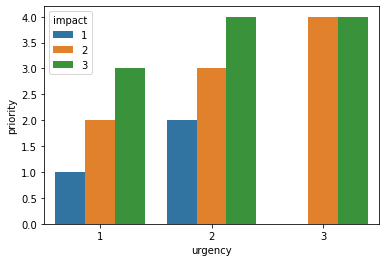

In [56]:
sns.barplot(x=df.urgency,y=df.priority,hue=df.impact,data=df)
#Relationship btwn priority,impact,urgency

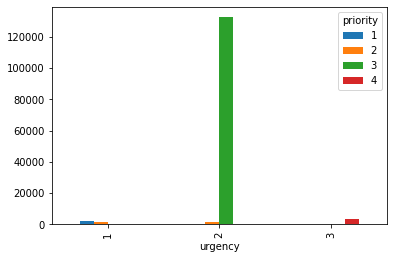

In [57]:
pd.crosstab(df.urgency,df.priority).plot(kind='bar')

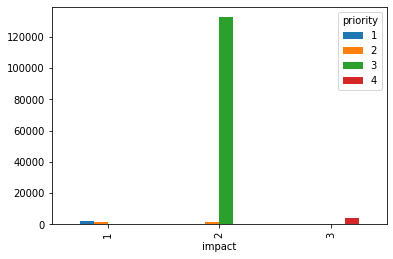

In [58]:
pd.crosstab(df.impact,df.priority).plot(kind='bar')

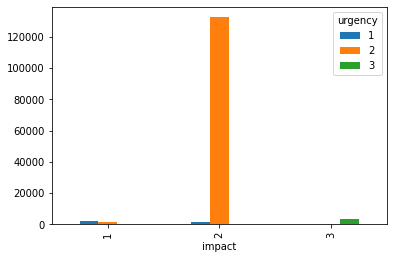

In [59]:
pd.crosstab(df.impact,df.urgency).plot(kind='bar')

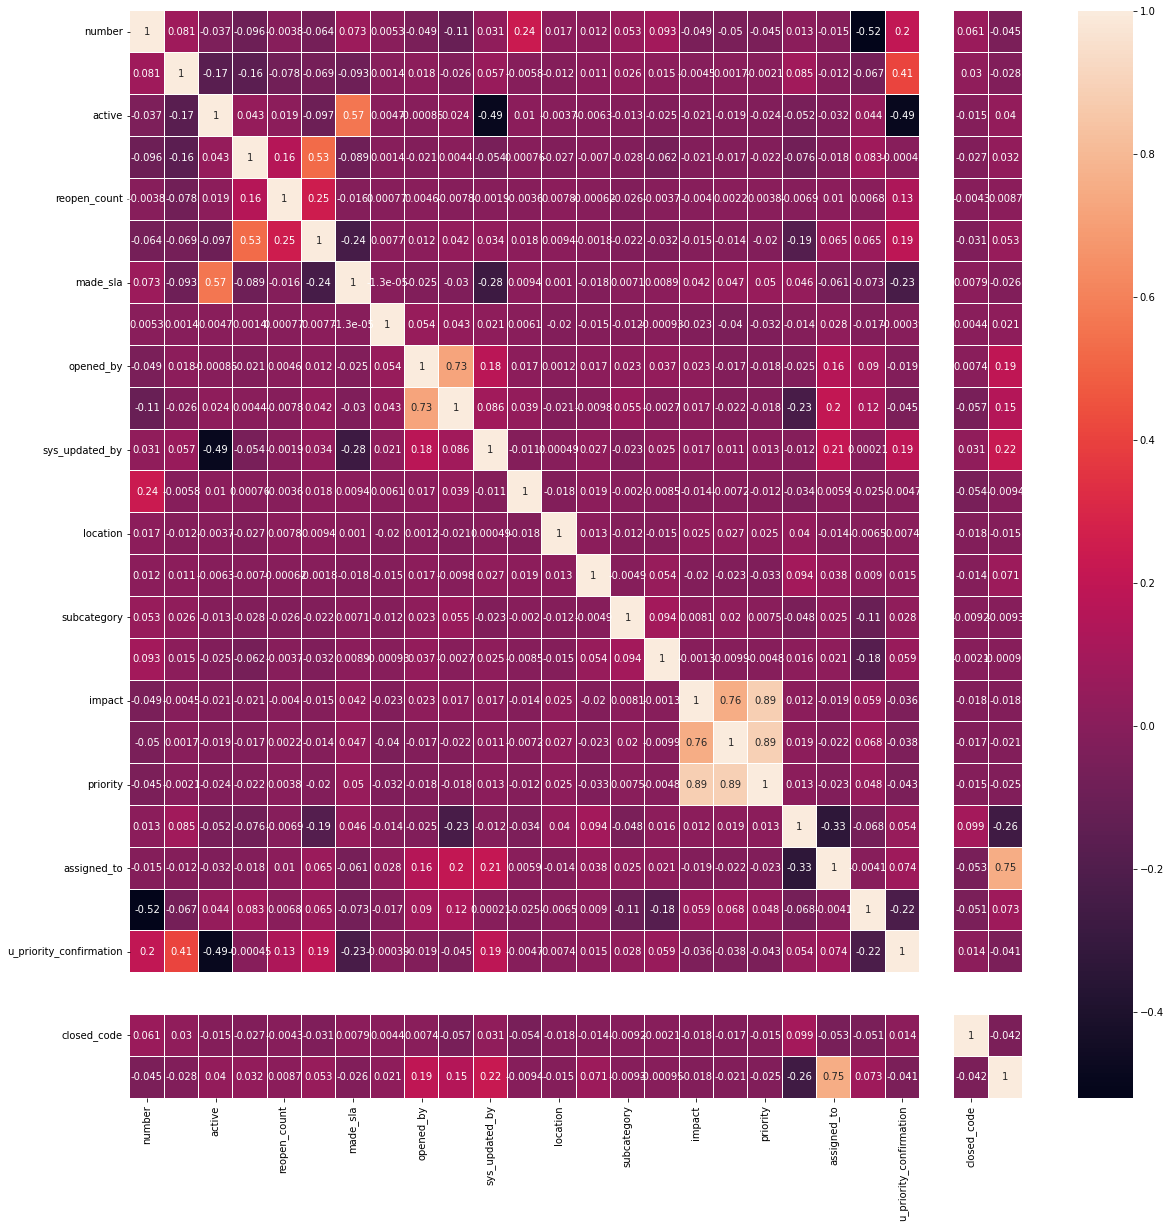

In [60]:
sns.heatmap(df.corr(),annot=True,linewidths=0.02)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [61]:
#Outliers prediction using isolation forest
df1 = df.select_dtypes('int64')
clf = IsolationForest(random_state=10,contamination=.01)#contamination: based on domain knowlege we are defiining that 1% of outliers might be present
clf.fit(df1)
df['anomaly'] = clf.predict(df1)#predicting the outliers
df['anomaly_scores']=clf.decision_function(df1)
print('Total no of outliers ',len(df[df['anomaly']==-1]))
df[df['anomaly']==-1]


Total no of outliers  1418


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,anomaly,anomaly_scores
137,84,5,0,0,0,19,0,3038,433,2016-02-29 08:39:00,10,2016-04-07 14:50:00,908,2016-04-17 15:07:00,3,204,45,220,253,3,3,4,66,175,1,1,0,6,158,2016-12-04 14:46:00,2016-04-17 15:07:00,-1,-0.018003
167,89,5,0,3,0,9,1,4907,180,2016-02-29 08:51:00,81,2016-02-29 09:03:00,908,2016-08-03 15:00:00,3,108,45,94,609,2,3,4,33,216,1,0,0,1,197,2016-03-03 14:35:00,2016-08-03 15:00:00,-1,-0.003385
179,94,5,0,0,0,10,0,387,433,2016-02-29 08:58:00,10,2016-04-07 14:50:00,908,2016-03-24 18:50:00,3,204,45,220,491,3,3,4,66,193,1,0,0,6,184,2016-10-03 10:45:00,2016-03-24 18:50:00,-1,-0.006698
219,102,5,0,4,1,19,0,307,131,2016-02-29 09:06:00,62,2016-02-29 09:13:00,908,2016-03-24 18:59:00,3,46,37,135,87,2,2,3,23,31,1,0,0,4,30,2016-03-17 16:28:00,2016-03-24 18:59:00,-1,-0.027281
230,104,5,0,1,0,6,0,5180,180,2016-02-29 09:08:00,81,2016-02-29 09:17:00,908,2016-06-03 12:00:00,3,51,53,168,116,1,2,2,30,201,1,1,0,6,183,2016-01-03 11:55:00,2016-06-03 12:00:00,-1,-0.031815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141686,119983,5,0,0,0,1,1,831,508,2017-02-14 11:11:00,10,2016-04-07 14:50:00,931,2017-02-14 11:11:00,2,246,50,10,533,3,2,4,70,17,0,0,0,6,15,2016-03-06 16:29:00,2017-02-14 11:11:00,-1,-0.002291
141688,119987,5,0,0,0,1,1,831,508,2017-02-14 11:15:00,10,2016-04-07 14:50:00,931,2017-02-14 11:15:00,2,246,50,10,533,3,2,4,70,17,0,0,0,6,15,2016-03-06 16:29:00,2017-02-14 11:15:00,-1,-0.002291
141690,120268,5,0,0,0,1,1,1057,508,2017-02-14 18:31:00,10,2016-04-07 14:50:00,931,2017-02-14 18:31:00,2,246,50,10,533,3,2,4,70,17,0,0,0,6,15,2016-03-06 16:29:00,2017-02-14 18:31:00,-1,-0.002291
141692,120303,5,0,0,0,1,1,1866,508,2017-02-15 01:52:00,10,2016-04-07 14:50:00,931,2017-02-15 01:52:00,2,246,50,10,533,3,2,4,70,17,0,0,0,6,15,2016-03-06 16:29:00,2017-02-15 01:52:00,-1,-0.001232


In [63]:

#Saving the cleaned file for future reference
#df.to_csv('DataClean_incident_event_log.csv',index=False)

In [89]:
#We are doing this to get the same proportion/data distributions even after splitting the data from the original data
def get_class_count(df):
  grp = df.groupby(['impact'])['number'].nunique()
  return {key : grp[key] for key in list(grp.keys())}

def get_class_proportion(df):
  count = get_class_count(df)
  return { val[0] : round(val[1]/df.shape[0],4) for val in count.items()}

print('Dataset class count',get_class_count(df))
print('Dataset class proportion',get_class_proportion(df))
#we use stratify which will lock the distribution of classes in train and test sets which will hold the same distribution
train,test = train_test_split(df,test_size=0.3,stratify=df['impact'],random_state=1)
print('Dataset class proportion after partition',get_class_proportion(train))
print('Dataset class proportion after partition',get_class_proportion(test))
#We are splitting the data into train test after EDA as we understand the data and patterns completly
#Next step is feature engg and we use sme ML algo for Feature engg i.e we shuldn't allow model to remember so before feature engg only we divide data
df_1 = train.copy()
Y_train= df_1.impact
X_train = df_1.drop(columns=['impact','opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at','anomaly','anomaly_scores'])

Dataset class count {1: 512, 2: 23967, 3: 764}
Dataset class proportion {1: 0.0036, 2: 0.1691, 3: 0.0054}
Dataset class proportion after partition {1: 0.0051, 2: 0.2376, 3: 0.0075}
Dataset class proportion after partition {1: 0.0098, 2: 0.4452, 3: 0.0133}


In [128]:
'''Feature Selection
1. Filter methods: It pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and 
less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.
  Filter Methods:
    Information Gain
    Chi-square Test
    Fisher’s Score
    Pearson Correlation
    Variance Threshold
    Mean Absolute Difference (MAD)
2.Wrapper Methods: to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset.
. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion
  Wrapper Methods:
    Forward Feature Selection
    Backward Feature Elimination
    Exhaustive Feature Selection
    Recursive Feature Elimination
3.Embedded Methods:These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable 
computational cost. Embedded methods are iterative and  extracts those features which contribute the most to the training for a particular iteration.
  Embedded Methods:
    LASSO Regularization (L1)
    Random Forest
    Decission Tree'''


'Feature Selection\n1. Filter methods: It pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and \nless computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.\n  Filter Methods:\n    Information Gain\n    Chi-square Test\n    Fisher’s Score\n    Pearson Correlation\n    Variance Threshold\n    Mean Absolute Difference (MAD)\n2.Wrapper Methods: to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset.\n. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion\n  Wrapper Methods:\n    Forward Feature Selection\n    Backward Feature Elimination\n    Exhaustive Feature Selection\n    Recursive Feature Elimination\n3.Embedded Methods:These methods encom

In [95]:
#Feature Selection
#1. decisison Tree
model_dt_entropy = DecisionTreeClassifier(criterion='entropy')# as the dependent var is categorical so we can use either c5.0(entropy) or CART(gini impurities)
model_dt_entropy.fit(X_train,Y_train)
#print("Decession Tree Feature selection using C5.0 or Entropy \n",model_dt_entropy.feature_importances_)
model_dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_dt_gini.fit(X_train, Y_train)
#print("Decession Tree Feature selection using Gini Impurities \n",model_dt_gini.feature_importances_)
feature_imp_df = pd.DataFrame([X_train.columns,model_dt_entropy.feature_importances_,model_dt_gini.feature_importances_]).T
feature_imp_df.columns = ['feature','DT_Entropy_FI','DT_Ginni_FI']

#2. Mutual Info btwn two random variable(dependent and independent) which measures the dependency between them. It uses KNN
#It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency with Y.
from sklearn.feature_selection import mutual_info_classif,SelectKBest,chi2
classif = mutual_info_classif(X_train,Y_train)
feature_imp_df['mutual_info_classif_FI'] = classif

#3. Chi-squared and f_classif using SelectKBest
from sklearn.feature_selection import SelectKBest,chi2,f_classif
# chi2 gives the score of each feature and highest score we consider for feature selection in the same order of the column name
selectKBest_chi2 = SelectKBest(score_func = chi2)
selectKBest_chi2.fit(X_train, Y_train)
feature_imp_df['selectKBest_chi2_FI'] = selectKBest_chi2.scores_
feature_imp_df['selectKBest_chi2_FI'] = round(feature_imp_df['selectKBest_chi2_FI'],3)
#Same as above mutual_info_classif algo it is just using selectKBest algo
'''selectKBest_MIF = SelectKBest(score_func = mutual_info_classif)
selectKBest_MIF.fit(X_train, Y_train)
feature_imp_df['selectKBest_MIF_FI'] = selectKBest_MIF.scores_
feature_imp_df['selectKBest_MIF_FI'] = round(feature_imp_df['selectKBest_MIF_FI'],3)'''
#ANOVA f-test in the f_classif used in a feature selection strategy, such as selecting the top k most relevant features (largest values)
selectKBest_f_classif = SelectKBest(score_func = f_classif)
selectKBest_f_classif.fit(X_train, Y_train)
feature_imp_df['selectKBest_f_classif_FI'] = selectKBest_f_classif.scores_
feature_imp_df['selectKBest_f_classif_FI'] = round(feature_imp_df['selectKBest_f_classif_FI'],3)

#4. RFE
#ranking_ 1 means top feature and 2 means second top and it goes
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_sel = RFE(estimator=LogisticRegression(max_iter=400), step=10, verbose=5)
rfe_sel.fit(X_train,Y_train)
feature_imp_df['RFE_FI'] = rfe_sel.ranking_
feature_imp_df['RFE_FI'] = rfe_sel.ranking_

Decession Tree Feature selection using C5.0 or Entropy 
 [4.96811496e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.08024455e-04 0.00000000e+00 1.13727697e-03
 8.96311430e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.99438463e-04 1.24667601e-03 1.53726810e-03 4.45369815e-04
 6.52959548e-02 9.14563337e-01 0.00000000e+00 2.82808687e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.00867348e-03 0.00000000e+00 0.00000000e+00 8.05286455e-04
 4.15248544e-04 0.00000000e+00 7.94226273e-04 1.66987225e-04
 1.71296813e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.68961153e-03
 1.12641787e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Decession Tree Feature selection using Gini Impurities 
 [0.00313984 0.         0.         0.         0.         0.
 0.         0.         0.00240962 0.         0.         0.
 0.         0.         0.00289941 0.         0.0034205  0.98813063
 0.         0

Fitting estimator with 45 features.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 35 features.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 25 features.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([4, 1, 4, 1, 4, 2, 4, 4, 3, 4, 3, 4, 2, 1, 3, 3, 1, 1, 1, 3, 1, 4,
       4, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 4, 1,
       1])

TypeError: ignored

In [130]:
feature_imp_df

,feature,DT_Entropy_FI,DT_Ginni_FI,mutual_info_classif_FI,selectKBest_chi2_FI,selectKBest_MIF_FI,selectKBest_f_classif_FI,RFE_FI
0,number,0.004968,0.00314,0.178783,2903087.791,0.179,149.279,4
1,incident_state,0.0,0.0,0.005453,12.018,0.004,3.316,1
2,active,0.0,0.0,0.015126,10.703,0.016,30.362,4
3,reassignment_count,0.0,0.0,0.003872,171.283,0.003,31.152,1
4,reopen_count,0.0,0.0,0.000948,42.286,0.001,10.361,4
5,sys_mod_count,0.000308,0.0,0.004793,1276.484,0.004,54.466,2
6,made_sla,0.0,0.0,0.018955,10.973,0.020,84.753,4
7,caller_id,0.001137,0.0,0.103632,58267.278,0.103,29.980,4
8,opened_by,0.000896,0.00241,0.070211,94838.385,0.071,257.805,3
9,sys_created_by,0.0,0.0,0.043286,21885.804,0.041,138.508,4


In [62]:
pps_matrix = pps.matrix(df.iloc[:,0:-2])
pps_df = pps_matrix[['x', 'y', 'ppscore','baseline_score','model_score']]
#Calculate the Predictive Power Score (PPS) for "x predicts y"
#The score always ranges from 0 to 1 and is data-type agnostic.
#A score of 0 means that the column x cannot predict the column y better than a naive baseline model.
#A score of 1 means that the column x can perfectly predict the column y given the model.
#A score between 0 and 1 states the ratio of how much potential predictive power the model achieved compared to the baseline model.
#and to consider the feature if p score is > 0.5 and if model score is greater than the baseline score then we can consider the feature
index = []
for x in np.arange(len(pps_df)):
  if(pps_df.iloc[x].ppscore > 0.5 and pps_df.iloc[x].ppscore < 1):
      index.append(x)

pps_df.iloc[index]

,x,y,ppscore,baseline_score,model_score
14,number,contact_type,0.542857,0.0070,0.003200
24,number,knowledge,0.964932,0.1768,0.006200
33,incident_state,active,0.997690,0.1710,0.000395
232,caller_id,location,0.529441,45.9634,21.628485
279,opened_at,number,0.989287,9227.0040,98.847433
303,opened_at,knowledge,0.955090,0.1768,0.007940
318,sys_created_by,opened_by,0.519804,112.7590,54.146434
341,sys_created_at,number,0.622443,9227.0040,3483.715703
403,sys_updated_at,number,0.743171,9227.0040,2369.758720
427,sys_updated_at,knowledge,0.526475,0.1768,0.083719
